In [ ]:
#For my analysis, I have used the existing .csv files and have answered the questions listed. 

In [20]:
from pandas.plotting import autocorrelation_plot, scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
np.set_printoptions(precision=4, suppress=True)
plt.rc('figure', figsize=(12, 6))

In [21]:
pwd

'/Users/arushigupta/Downloads'

In [23]:
aapl=pd.read_csv ('/Users/arushigupta/Desktop/aapl.csv')

In [25]:
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-02-28,63.435715,63.981430,63.057144,63.057144,47.371712,80628800
1,2013-03-01,62.571430,62.597141,61.425713,61.495716,46.198692,138112100
2,2013-03-04,61.114285,61.171429,59.857143,60.007141,45.080402,145688900
3,2013-03-05,60.211430,62.169998,60.107143,61.591427,46.270584,159608400
4,2013-03-06,62.072857,62.178570,60.632858,60.808571,45.682465,115062500


In [26]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
Date         1260 non-null object
Open         1260 non-null float64
High         1260 non-null float64
Low          1260 non-null float64
Close        1260 non-null float64
Adj Close    1260 non-null float64
Volume       1260 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [27]:
aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,110.162941,111.078524,109.241169,110.184991,104.441953,5.327377e+07
std,30.855295,31.018117,30.678413,30.873132,34.239059,3.278032e+07
min,55.424286,57.085712,55.014286,55.790001,41.912258,1.147590e+07
25%,89.758213,90.697498,89.380357,90.161785,84.216866,2.973410e+07
50%,109.369999,110.469998,108.505001,109.445003,105.362095,4.500630e+07
75%,128.010004,128.969998,126.942499,127.842501,121.487122,6.799345e+07
max,179.369995,180.619995,178.250000,179.259995,178.970001,2.663808e+08


In [31]:
aapl = pd.read_csv('/Users/arushigupta/Desktop/aapl.csv', usecols=['Date','Adj Close'], parse_dates=['Date'], index_col = 'Date', squeeze=True)
aapl.head(5)

Date
2013-02-28    47.371712
2013-03-01    46.198692
2013-03-04    45.080402
2013-03-05    46.270584
2013-03-06    45.682465
Name: Adj Close, dtype: float64

In [32]:
aapl.describe()

count    1260.000000
mean      104.441953
std        34.239059
min        41.912258
25%        84.216866
50%       105.362095
75%       121.487122
max       178.970001
Name: Adj Close, dtype: float64

In [36]:
aapl_monthend=aapl.resample ('BM').last()
aapl_monthend.head()


Date
2013-02-28    47.371712
2013-03-29    47.506943
2013-04-30    47.519821
2013-05-31    50.594505
2013-06-28    44.609531
Freq: BM, Name: Adj Close, dtype: float64

In [40]:
intc = pd.read_csv('/Users/arushigupta/Desktop/INTC.csv', usecols=['Date','AdjClose'], parse_dates=['Date'], index_col = 'Date', squeeze=True)
ebay = pd.read_csv('/Users/arushigupta/Desktop/ebay.csv', usecols=['Date','AdjClose'], parse_dates=['Date'], index_col = 'Date', squeeze=True)
amazon = pd.read_csv('/Users/arushigupta/Desktop/amazon.csv', usecols=['Date','Adj Close'], parse_dates=['Date'], index_col = 'Date', squeeze=True)

In [45]:
intc_monthend=intc.resample('BM').last()
intc_monthend.head()

Date
2013-02-28    17.865846
2013-03-29    18.682986
2013-04-30    20.492673
2013-05-31    20.970127
2013-06-28    20.926943
Freq: BM, Name: AdjClose, dtype: float64

In [46]:
ebay_monthend=ebay.resample('BM').last()
ebay_monthend.head()



Date
2013-02-28    21.523802
2013-03-29    21.331029
2013-04-30    20.611077
2013-05-31    21.283819
2013-06-28    20.347488
Freq: BM, Name: AdjClose, dtype: float64

In [47]:
amazon_monthend=amazon.resample('BM').last()
amazon_monthend.head()

Date
2013-02-28    264.269989
2013-03-29    266.489990
2013-04-30    253.809998
2013-05-31    269.200012
2013-06-28    277.690002
Freq: BM, Name: Adj Close, dtype: float64

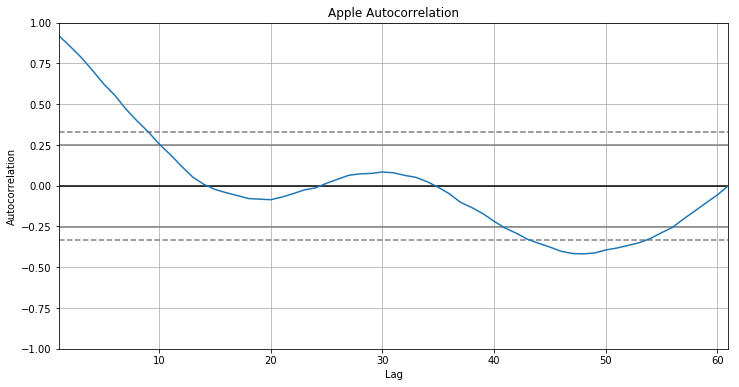

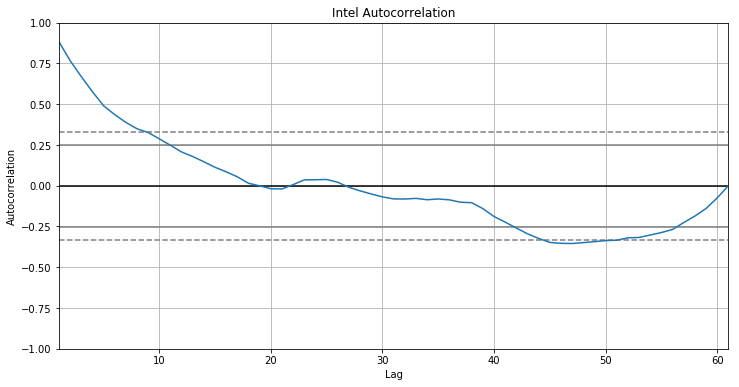

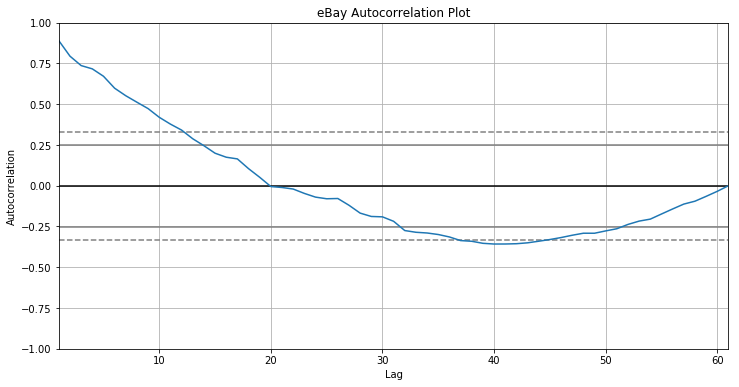

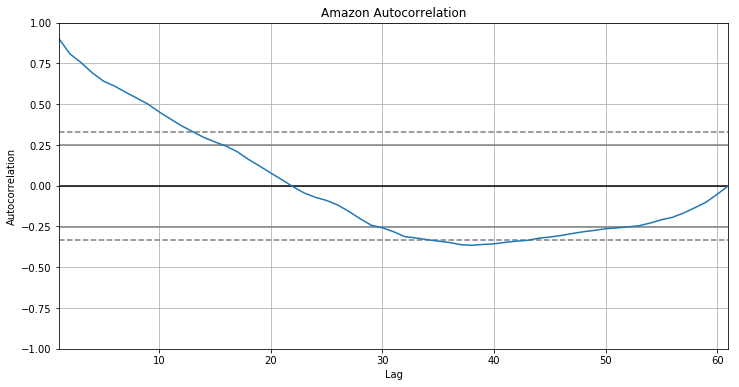

In [48]:
plt.figure()
autocorrelation_plot(aapl_monthend)
plt.title('Apple Autocorrelation')
plt.figure()
autocorrelation_plot(intc_monthend)
plt.title('Intel Autocorrelation')
plt.figure()
autocorrelation_plot(ebay_monthend)
plt.title('eBay Autocorrelation Plot')
plt.figure()
autocorrelation_plot(amazon_monthend)
plt.title('Amazon Autocorrelation')
plt.show()

In [49]:
aapl_returns = aapl_monthend / aapl_monthend.shift(1) - 1
aapl_returns.name = 'AAPL'
aapl_returns.head()

Date
2013-02-28         NaN
2013-03-29    0.002855
2013-04-30    0.000271
2013-05-31    0.064703
2013-06-28   -0.118293
Freq: BM, Name: AAPL, dtype: float64

In [50]:
intc_returns=intc_monthend/intc_monthend.shift(1)-1
intc_returns.name='INTC'
intc_returns.head()

Date
2013-02-28         NaN
2013-03-29    0.045738
2013-04-30    0.096863
2013-05-31    0.023299
2013-06-28   -0.002059
Freq: BM, Name: INTC, dtype: float64

In [53]:
ebay_returns=ebay_monthend/ebay_monthend.shift(1)-1
ebay_returns.name='EBAY'
ebay_returns.head()

Date
2013-02-28         NaN
2013-03-29   -0.008956
2013-04-30   -0.033751
2013-05-31    0.032640
2013-06-28   -0.043993
Freq: BM, Name: EBAY, dtype: float64

In [54]:
amazon_returns=amazon_monthend/amazon_monthend.shift(1)-1
amazon_returns.name='AMAZON'
amazon_returns.head()

Date
2013-02-28         NaN
2013-03-29    0.008401
2013-04-30   -0.047581
2013-05-31    0.060636
2013-06-28    0.031538
Freq: BM, Name: AMAZON, dtype: float64

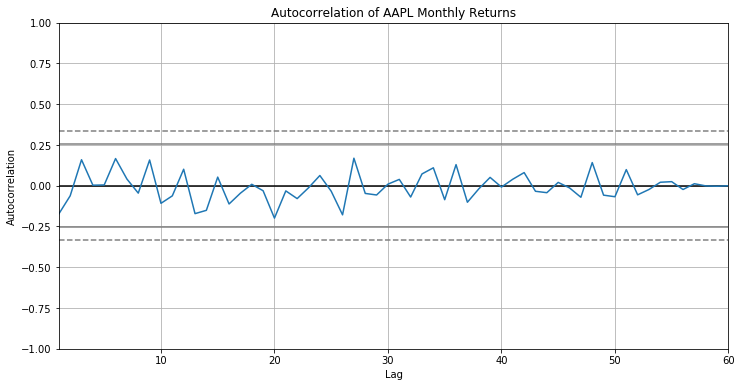

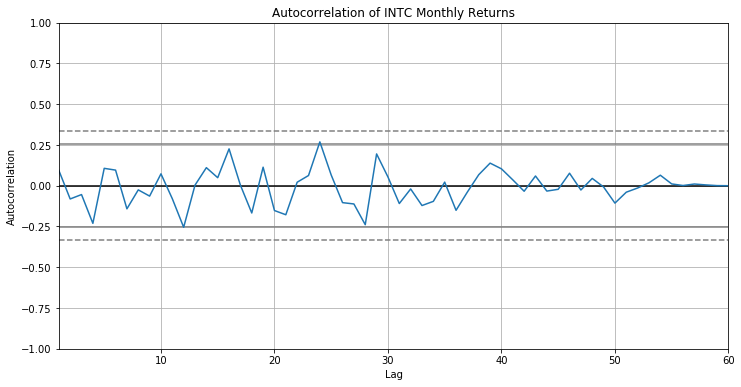

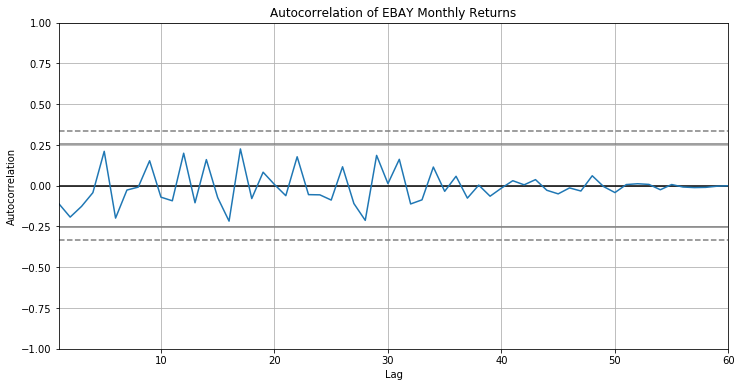

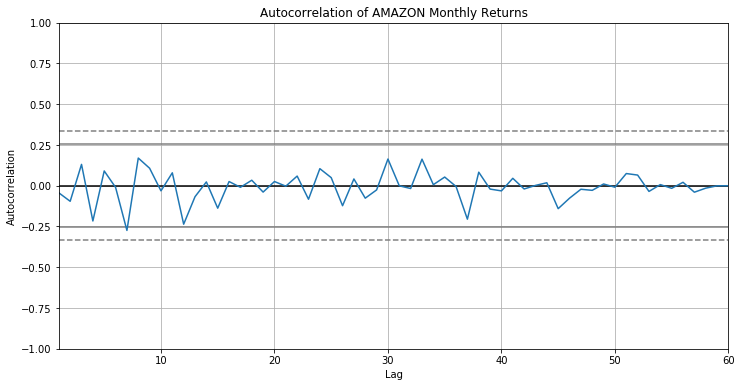

In [57]:
#plots below state that they are not autocorrelated

plt.figure()
autocorrelation_plot(aapl_returns.dropna())
plt.title('Autocorrelation of AAPL Monthly Returns')
plt.figure()
autocorrelation_plot(intc_returns.dropna())
plt.title('Autocorrelation of INTC Monthly Returns')
plt.figure()
autocorrelation_plot(ebay_returns.dropna())
plt.title('Autocorrelation of EBAY Monthly Returns')
plt.figure()
autocorrelation_plot(amazon_returns.dropna())
plt.title('Autocorrelation of AMAZON Monthly Returns')
plt.show()